# Part 4: Linear regression

### Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Importing the Crime Data

In [2]:
data = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

### Focus Crimes

In [3]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

### Create Focus Crimes Dataset

In [4]:
focus_data = data.copy()
focus_data = focus_data[focus_data['Category'].isin(focuscrimes)]

### Convert Date to Datetime

In [5]:
focus_data['Date'] = pd.to_datetime(focus_data['Date'], format='%m/%d/%Y')

### Create the Temporal Pattern across the Week

In [6]:
focus_data['int_hour'] = pd.to_datetime(focus_data['Time'], format = '%H:%M').dt.hour
focus_data['int_day'] = focus_data['DayOfWeek'].str.replace('Monday', '0').replace('Tuesday', '24').replace('Wednesday', '48').str.replace('Thursday', '72').str.replace('Friday', '96').str.replace('Saturday', '120').str.replace('Sunday', '144')
focus_data['int_day'] = focus_data['int_day'].astype(int)
focus_data['Weekhour'] = focus_data['int_hour'] + focus_data['int_day']

weekhours = list(range(168))
pivot = pd.pivot_table(focus_data, index = "Category", columns = "Weekhour", values = 'IncidntNum' ,aggfunc = 'count')
pivot = pivot[weekhours]

### 91 Plots

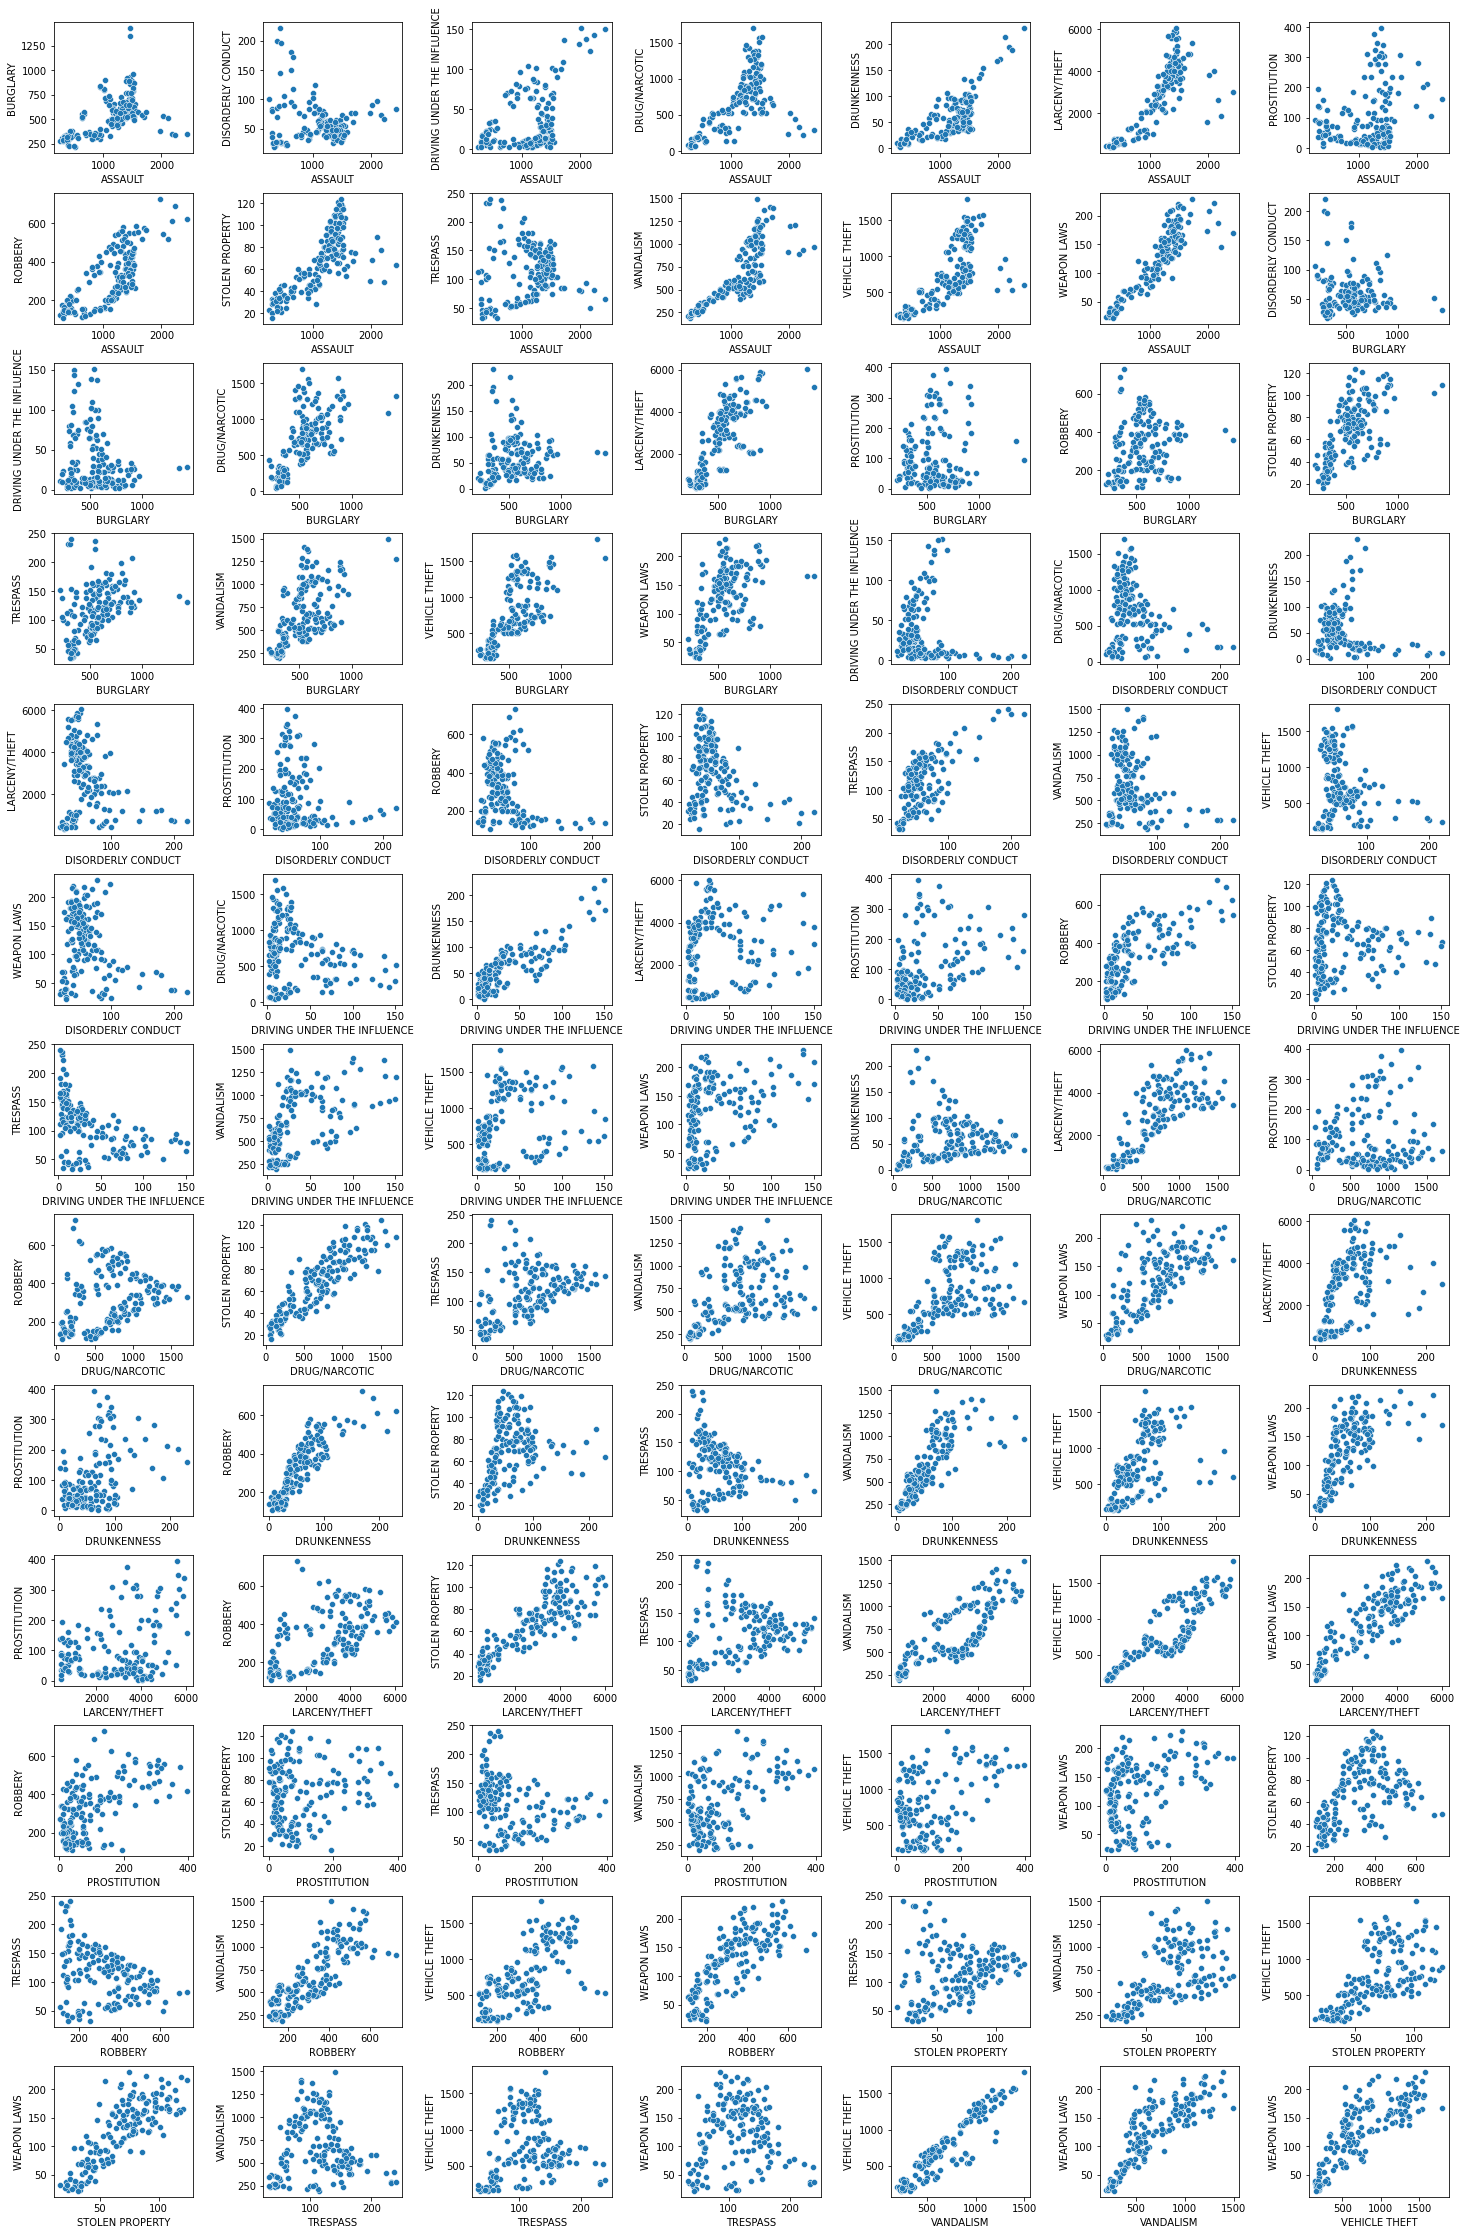

In [7]:
fig, axes = plt.subplots(nrows=13, ncols=7, figsize=(25,40), sharex=False)
plt.subplots_adjust(wspace=0.5, hspace=0.3)
c=0

for i, crime in enumerate(focuscrimes):
    j = i + 1
    while j < 14:
        sns.scatterplot(data = pivot, x = pivot.iloc[i], y =pivot.iloc[j], ax=axes[c//7,c%7])
        c+=1
        j+=1

### 91 Plots with Linear Regresion

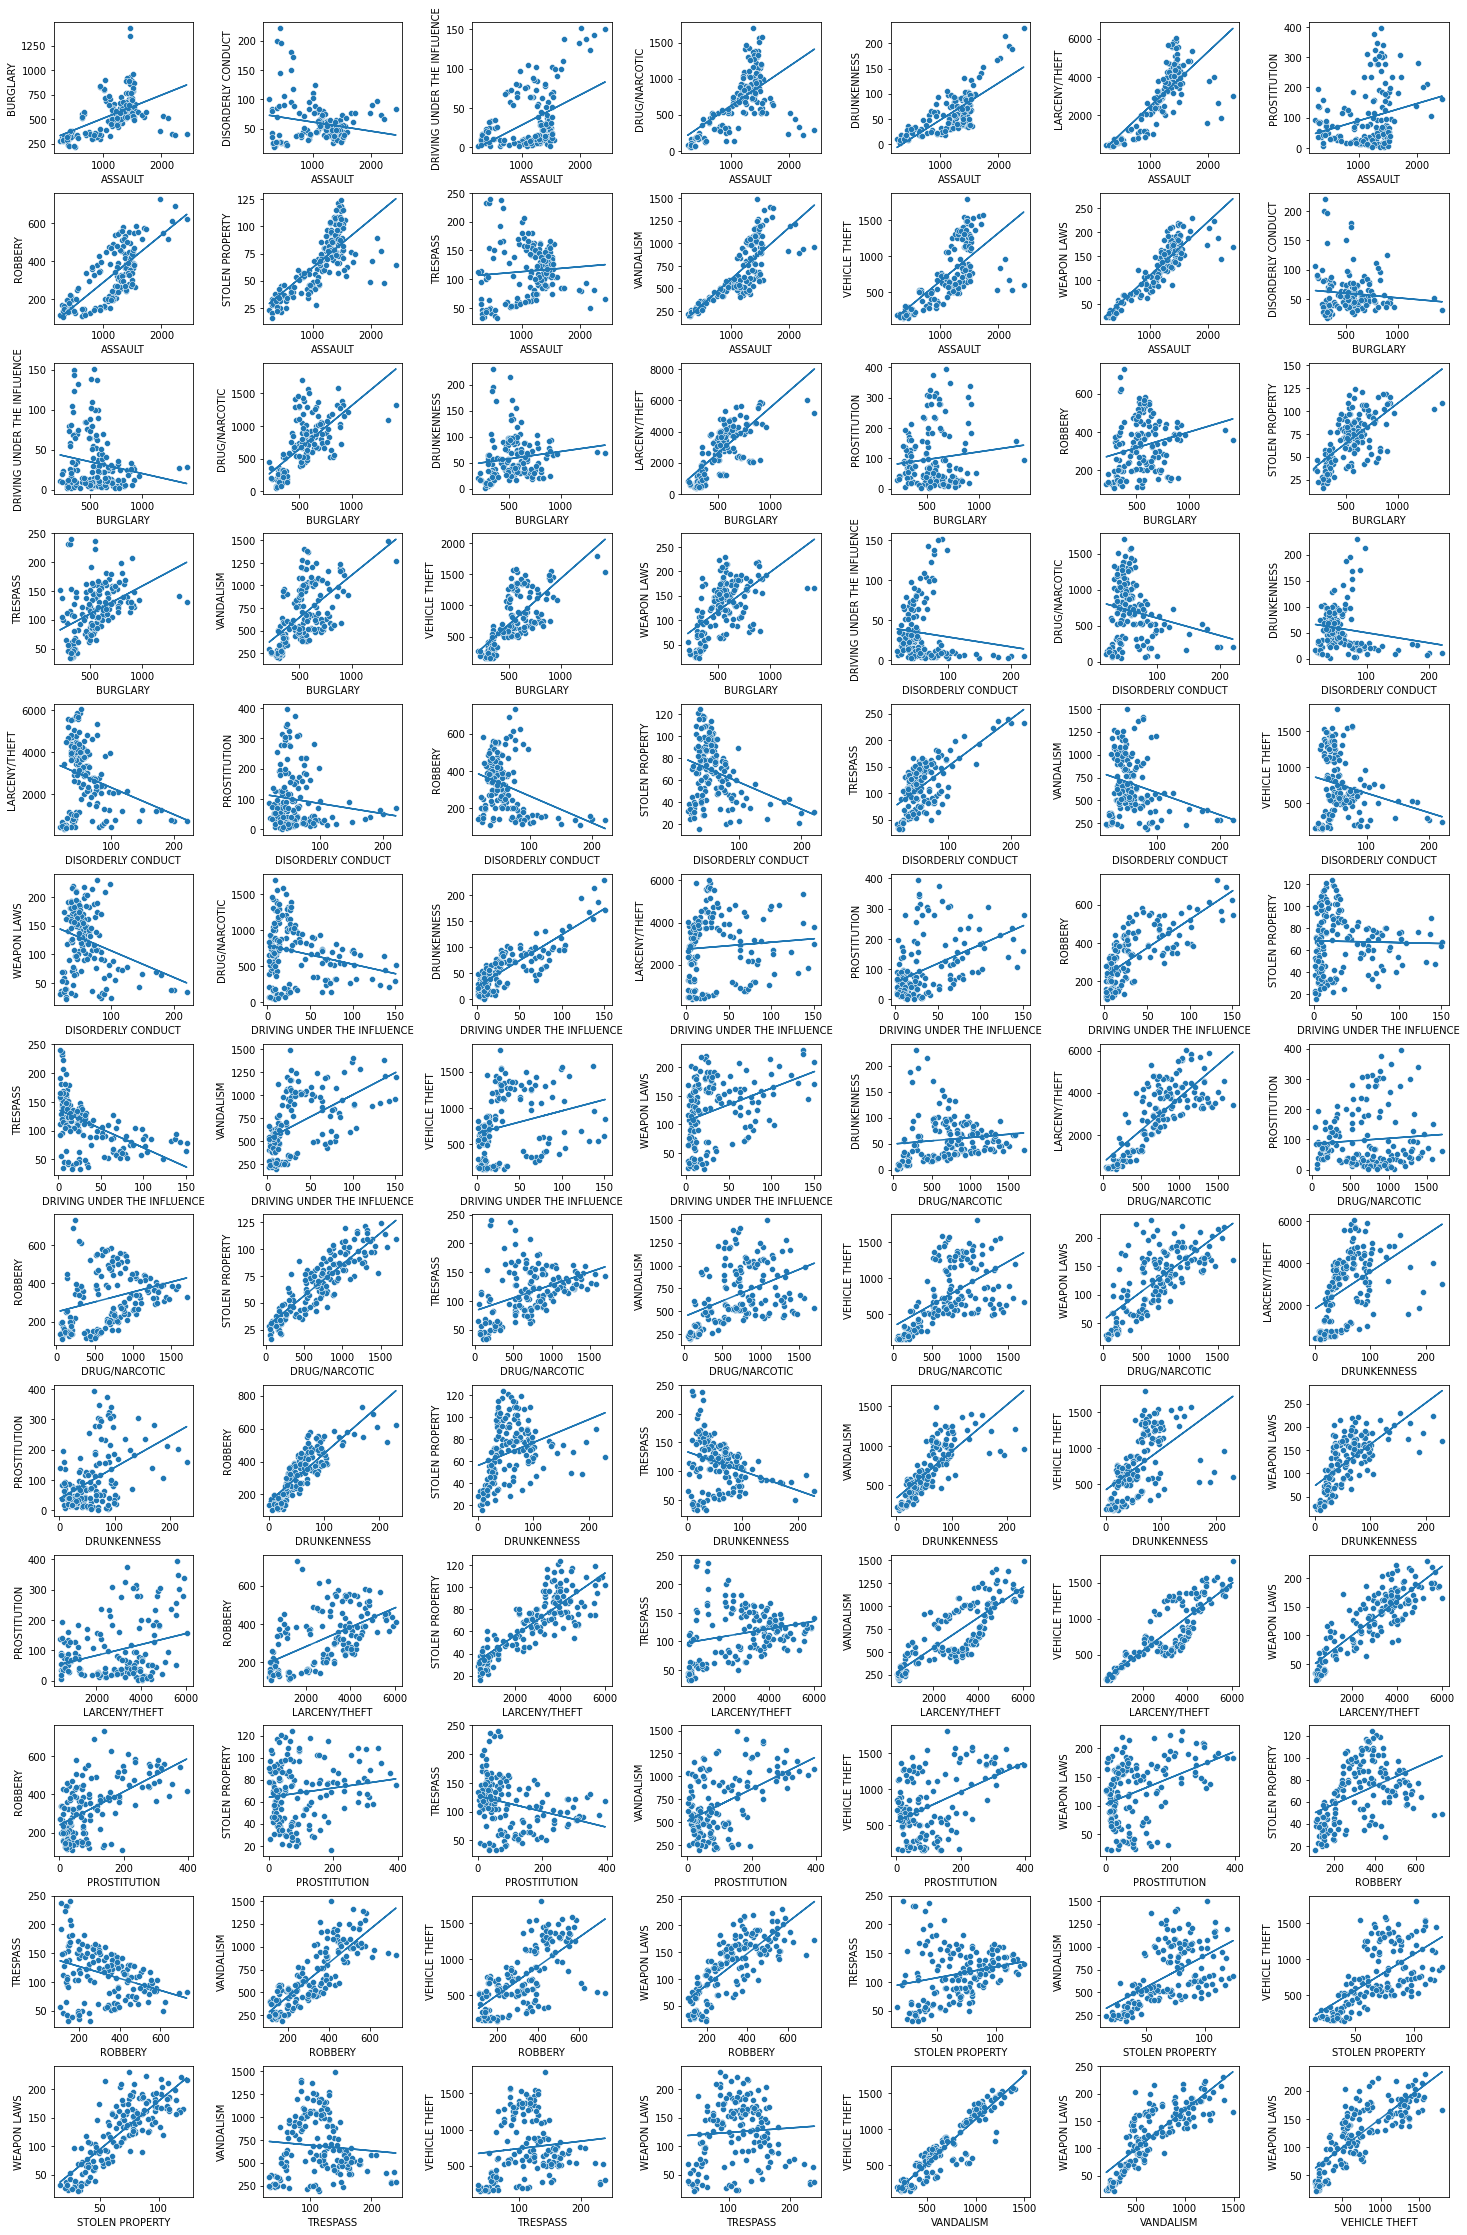

In [8]:
fig, axes = plt.subplots(nrows=13, ncols=7, figsize=(25,40), sharex=False)
plt.subplots_adjust(wspace=0.5, hspace=0.3)
c=0

for i, crime in enumerate(focuscrimes):
    j = i + 1
    while j < 14:
        sns.scatterplot(data = pivot, x = pivot.iloc[i], y =pivot.iloc[j], ax=axes[c//7,c%7])
        a, b = np.polyfit(pivot.iloc[i], pivot.iloc[j], 1)
        axes[c//7,c%7].plot(pivot.iloc[i], a*pivot.iloc[i] + b)
        c+=1
        j+=1